# [NYC](http://www.ffts.com/recipes.htm#othersources)

Analysis of dataset should contain: 
* [Plantuml](https://plantuml.com/de/json) diagram of json structure 
* Amount of recipes
* Plots:
 * Num of Instructions
 * Num of Ingredients
 * Most used words in Instructions
 * Most used words in Ingedients
 * (Optional) Kind of dish


In [48]:
# Import python librarys
import json
import re
import matplotlib.pyplot as plt
import numpy as np
import mmf

In [49]:
charsToRemove = "[,.*®©™()?!:;+{}]"
fractionRegex = re.compile("[0-9]+/[0-9]+")
# Counts words in a given list (ingredients/instructions) and returns their occurence in a dictionary
# Filters numbers (such as 1 apple or 1/2 apple) and puts them into 'numeric' category
def countWords(list, words_dict):
    for elem in list:
        text = elem.strip()
        strippedText = re.sub(charsToRemove, "", text.lower()).replace('advertisement', '')
        for word in strippedText.split():
            if word.isnumeric() or re.match(fractionRegex, word):
                words_dict['numeric'] = words_dict.setdefault('numeric', 0) + 1
            else:
                words_dict[word] = words_dict.setdefault(word, 0) + 1
    return words_dict

In [50]:
def countIngredients(list, words_dict):
    for elem in list:
        if elem.quantity.isnumeric() or re.match(fractionRegex, elem.quantity):
            words_dict['numeric'] = words_dict.setdefault('numeric', 0) + 1
        else:
            words_dict[elem.quantity] = words_dict.setdefault(elem.quantity, 0) + 1

        if elem.unit.isnumeric() or re.match(fractionRegex, elem.unit):
            words_dict['numeric'] = words_dict.setdefault('numeric', 0) + 1
        else:
            words_dict[elem.unit] = words_dict.setdefault(elem.unit, 0) + 1

        if elem.text.isnumeric() or re.match(fractionRegex, elem.text):
            words_dict['numeric'] = words_dict.setdefault('numeric', 0) + 1
        else:
            words_dict[elem.text] = words_dict.setdefault(elem.text, 0) + 1
    
    return words_dict

In [58]:
# Load data of nyc
file = open(".nyc/joined.mmf", encoding='cp437')
data = file.readlines()
recipes = mmf.parse_recipes(data)

In [60]:
for recipe in recipes:
    print(recipe.title)
    print(recipe.categories)
    print(recipe.servings)
    print(recipe.ingredients)
    print(recipe.directions)
    break

Zippy Tomato Sauce
['Sauces Toppings Vegetables']

8
[{2} {T} {Margarine Or Butter}, {1/2} {c} {Green Bell Pepper; Chopped,*}, {1} {ea} {Onion; Small, Thinly Sliced}, {8} {oz} {Tomato Sauce; 1 can}, {1} {c} {Chili Sauce}, {1} {t} {Worcestershire Sauce}, {1/4} {t} {Chili Powder}]
['*    You can use canned chopped Green Chiles or Jalapenos for a hotter ~------------------------------------------------------ ~----------------- Melt margarine in a small saucepan. Add green peppers and onion.  Cook and stir until the onion is tender.  (Note: If using the canned peppers, just cook the onion alone.)  Stir in all the remaining ingredients and heat to boiling, stirring occasionally.  Serve hot over patties.']


In [52]:
# Analysis
## Length of the dataset
sumRecipes = 0
# Total amount of ingredients and instructions
sumInstructions = 0
sumIngredients = 0
wordsInstructions = {}
wordsIngredients = {}
for value in recipes:
    sumRecipes += 1
    sumIngredients = sumIngredients + len(value.ingredients)
    wordsIngredients = countIngredients(value.ingredients, wordsIngredients)
    if value.directions:
        sumInstructions = sumInstructions + len(value.directions[0].split("."))
        wordsInstructions = countWords(value.directions[0].split("."), wordsInstructions)
    

print('Amount of recipes: ' + str(sumRecipes))
print('Amount of Ingredients: ' + str(sumIngredients))
print('Amount of Instructions: ' + str(sumInstructions))
print('Amount of different words in ingredients: ' + str(len(wordsIngredients)))
print('Amount of numeric expressions in ingredients: ' + str(wordsIngredients["numeric"]))
print('Amount of different words in instructions: ' + str(len(wordsInstructions)))
print('Amount of numeric expressions in instructions: ' + str(wordsInstructions["numeric"]))

Amount of recipes: 28287
Amount of Ingredients: 284307
Amount of Instructions: 232211
Amount of different words in ingredients: 77136
Amount of numeric expressions in ingredients: 236035
Amount of different words in instructions: 24442
Amount of numeric expressions in instructions: 88687


# Ingredients 
## Including numerical category

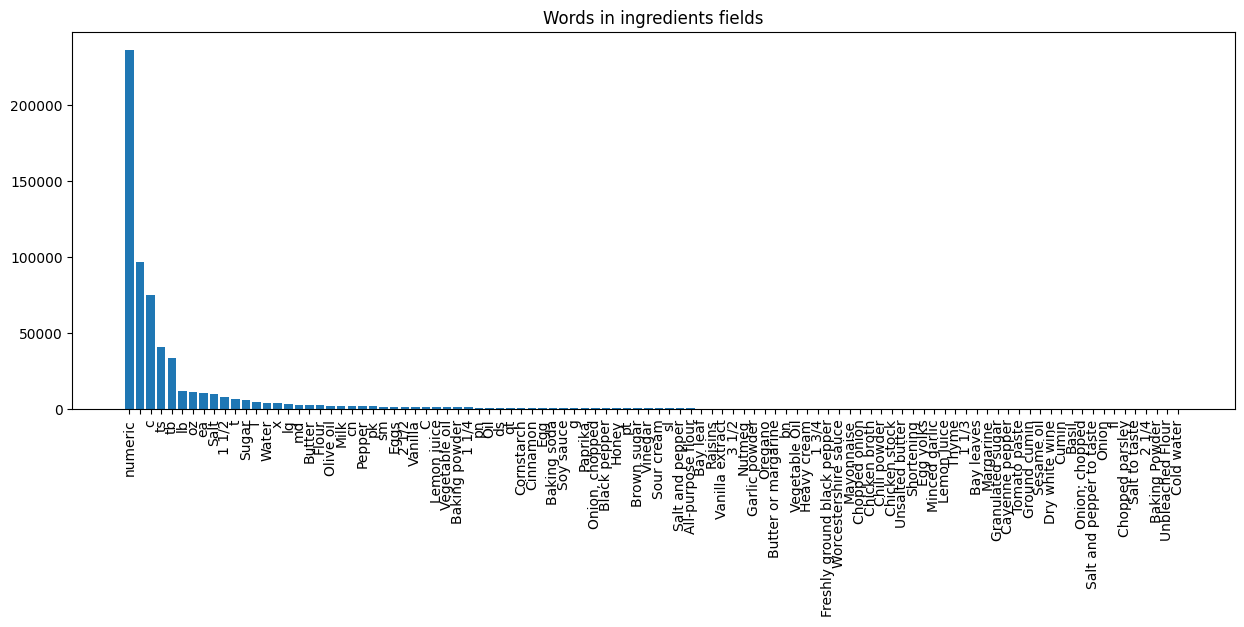

In [54]:
# Plot for ingredients words
# Sort and strip to 100 most used
wordsIngredientsStripped = sorted(wordsIngredients.items(), key=lambda x:x[1], reverse=True)[:101]

wordsIngredientsKeys, wordsIngredientsValues = zip(*wordsIngredientsStripped)
wordsIngredientsKeys = list(wordsIngredientsKeys)
wordsIngredientsValues = list(wordsIngredientsValues)
# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in ingredients fields")
plt.bar(wordsIngredientsKeys[:100], wordsIngredientsValues[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

## Excluding numerical category

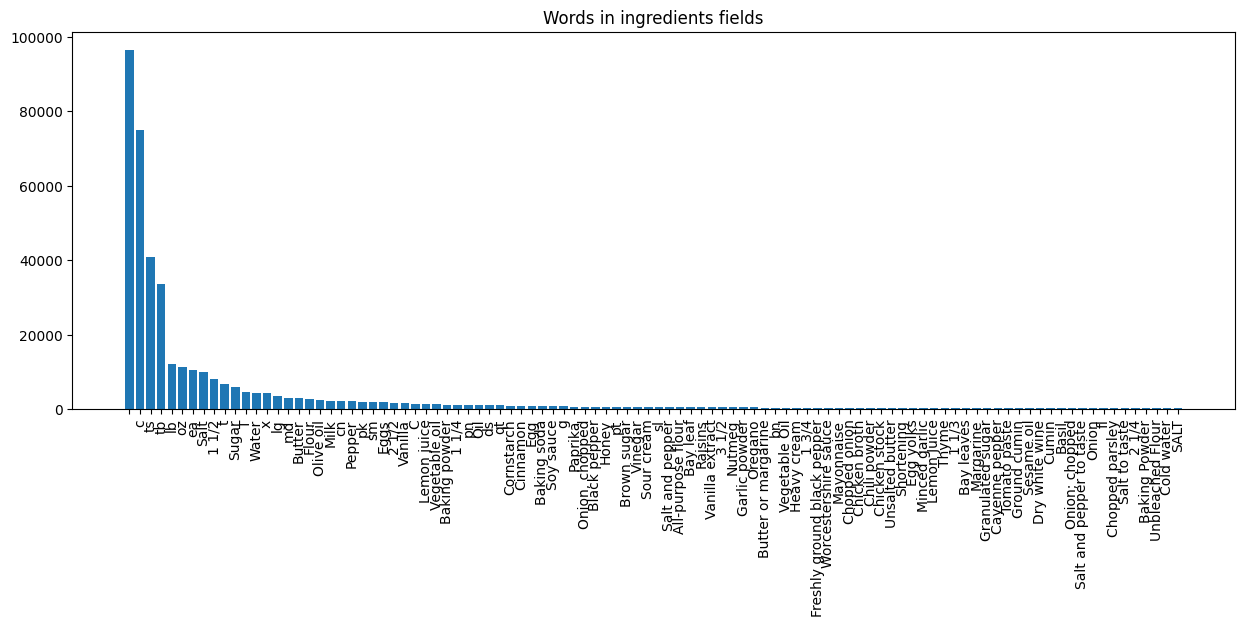

In [55]:
i = wordsIngredientsKeys.index('numeric')
del wordsIngredientsKeys[i]
del wordsIngredientsValues[i]

# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in ingredients fields")
plt.bar(wordsIngredientsKeys, wordsIngredientsValues, align='center')
plt.xticks(rotation='vertical')
plt.show()

# Instructions
## With numerical expressions

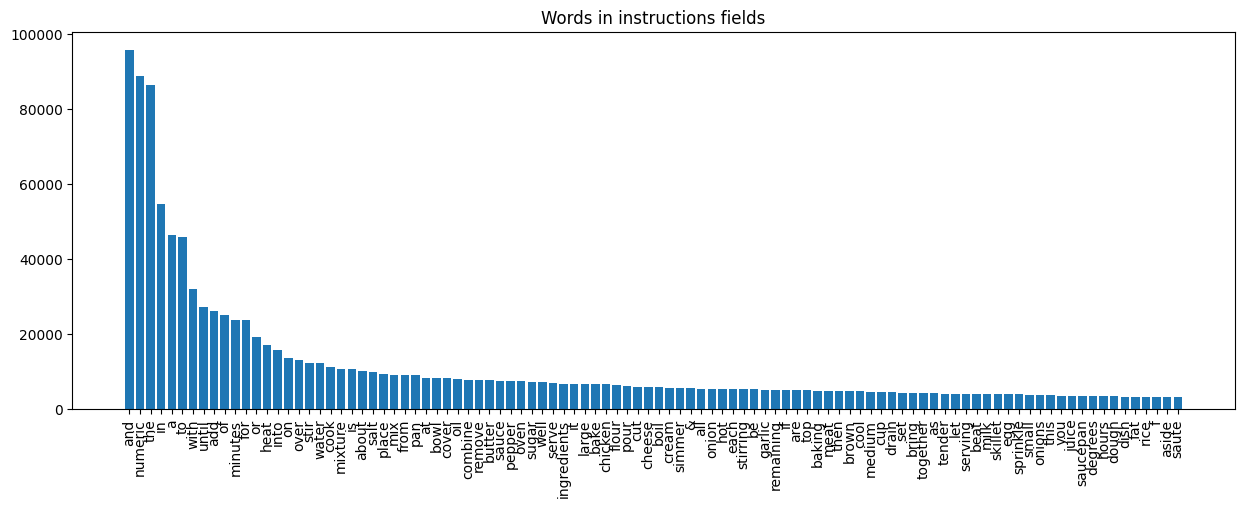

In [56]:
# Plot for instructions words
# Sort and strip to 100 most used
wordsInstructionsStripped = sorted(wordsInstructions.items(), key=lambda x:x[1], reverse=True)[:101]

wordsInstructionsKeys, wordsInstructionsValues = zip(*wordsInstructionsStripped)
wordsInstructionsKeys = list(wordsInstructionsKeys)
wordsInstructionsValues = list(wordsInstructionsValues)
# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in instructions fields")
plt.bar(wordsInstructionsKeys[:100], wordsInstructionsValues[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

## Without numerical expressions

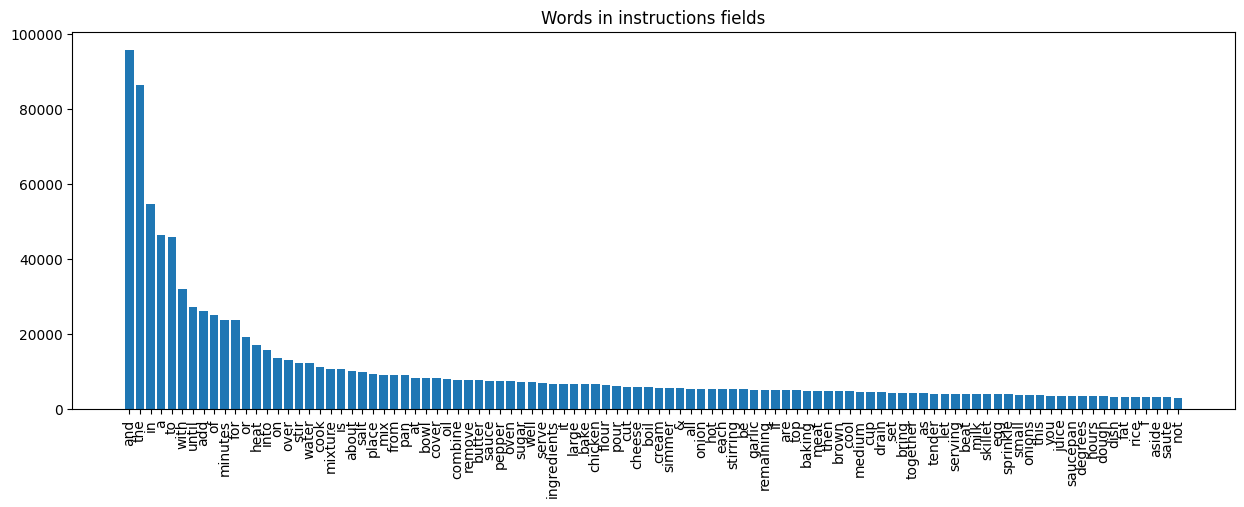

In [57]:
i = wordsInstructionsKeys.index('numeric')
del wordsInstructionsKeys[i]
del wordsInstructionsValues[i]

# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in instructions fields")
plt.bar(wordsInstructionsKeys, wordsInstructionsValues, align='center')
plt.xticks(rotation='vertical')
plt.show()